In [1]:
%matplotlib inline

from numpy import *
from numpy.linalg import solve, norm    # Solve linear systems and compute norms
from matplotlib.pyplot import *
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

## 1: Verify numerically the order of the composite Simpson’s formula. Include a convergence plot.

In [2]:
def simpson(f, a, b, m=10):
# Find an approximation to an integral by the composite Simpson's method:
# Input:  
#   f:    integrand
#   a, b: integration interval
#   m:    number of subintervals
# Output: The approximation to the integral
    n = 2*m
    x_noder = linspace(a, b, n+1)       # equidistributed nodes from a to b 
    h = (b-a)/n                         # stepsize
    S1 = f(x_noder[0]) + f(x_noder[n])  # S1 = f(x_0)+f(x_n)
    S2 = sum(f(x_noder[1:n:2]))         # S2 = f(x_1)+f(x_3)+...+f(x_m)
    S3 = sum(f(x_noder[2:n-1:2]))       # S3 = f(x_2)+f(x_4)+...+f(x_{m-1})
    S = h*(S1 + 4*S2 + 2*S3)/3
    return S

In [3]:
def approx_for_all_h(f, a, b, exact):
    n = 1
    h = (b - a) / n
    steps = []
    errors = []
    nmax = 10
    # Find Error
    for i in range(nmax):
        H_error = abs(exact - simpson(f,a,b,n))
        print(f'h = {h:8.2e}, e(h) = {H_error:8.6e}')
        steps.append(h)
        errors.append(H_error)
        n = 2*n
        h = (b - a) / n
        
    print('\n Order of P:')
    # Find order
    for k in range(1,nmax-1):
        p = log(errors[k+1]/errors[k])/log(steps[k+1]/steps[k])
        print(f'h = {steps[k]:8.2e},  p = {p:4.2f}')
    
        # Plott det hele
    clf()
    loglog(steps, errors, 'o-')
    xlabel('h')
    ylabel('e(h)')
    title('Plott av feilen for Simpsons regel')
    grid(True)

h = 2.00e+00, e(h) = 4.770858e-02
h = 1.00e+00, e(h) = 3.371719e-03
h = 5.00e-01, e(h) = 2.176196e-04
h = 2.50e-01, e(h) = 1.371233e-05
h = 1.25e-01, e(h) = 8.587707e-07
h = 6.25e-02, e(h) = 5.370057e-08
h = 3.12e-02, e(h) = 3.356714e-09
h = 1.56e-02, e(h) = 2.098012e-10
h = 7.81e-03, e(h) = 1.311262e-11
h = 3.91e-03, e(h) = 8.194556e-13

 Order of P:
h = 1.00e+00,  p = 3.95
h = 5.00e-01,  p = 3.99
h = 2.50e-01,  p = 4.00
h = 1.25e-01,  p = 4.00
h = 6.25e-02,  p = 4.00
h = 3.12e-02,  p = 4.00
h = 1.56e-02,  p = 4.00
h = 7.81e-03,  p = 4.00


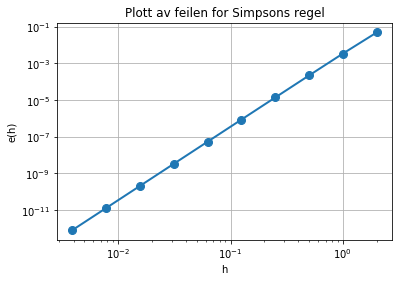

In [4]:
# Funksjonen som tilnærmes
def f1(x):
    return x * exp(x)

# Integrasjonsintervall og eksakt løsning
a, b = -1, 1
exact1 = 2 / exp(1)

# Selve approksimeringen og plottingen
approx_for_all_h(f1, a, b, exact1)

This shows the composite Simpson’s formula is of 4th order.

### 1b: Repeat with f(x) = sqrt(1-x^2)e^x

h = 2.00e+00, e(h) = 4.421664e-01
h = 1.00e+00, e(h) = 1.400960e-01
h = 5.00e-01, e(h) = 4.663949e-02
h = 2.50e-01, e(h) = 1.604128e-02
h = 1.25e-01, e(h) = 5.600621e-03
h = 6.25e-02, e(h) = 1.968458e-03
h = 3.12e-02, e(h) = 6.939746e-04
h = 1.56e-02, e(h) = 2.450144e-04
h = 7.81e-03, e(h) = 8.656573e-05
h = 3.91e-03, e(h) = 3.059507e-05

 Order of P:
h = 1.00e+00,  p = 1.59
h = 5.00e-01,  p = 1.54
h = 2.50e-01,  p = 1.52
h = 1.25e-01,  p = 1.51
h = 6.25e-02,  p = 1.50
h = 3.12e-02,  p = 1.50
h = 1.56e-02,  p = 1.50
h = 7.81e-03,  p = 1.50


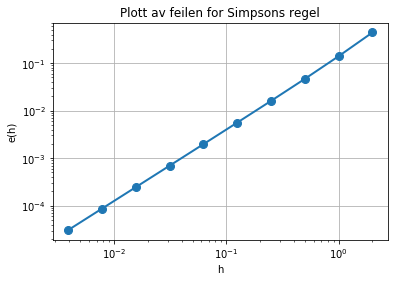

In [5]:
def f2(x):
    return sqrt(1 - x ** 2) * exp(x)

exact2 = 1.7754996892121809469
   
# Selve approksimeringen og plottingen
approx_for_all_h(f2, a, b, exact2)

Plot of integrals:

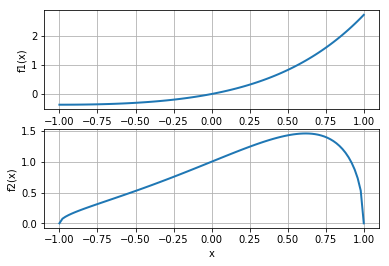

In [6]:
x = linspace(a,b,101)
subplot(2,1,1)
plot(x,f1(x))
xlabel('x')
ylabel('f1(x)')

subplot(2,1,2)
plot(x, f2(x))
xlabel('x')
ylabel('f2(x)');

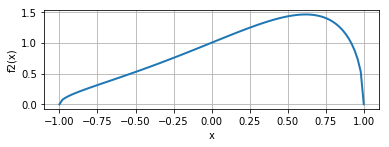

In [7]:
subplot(2,1,2)
plot(x, f2(x))
xlabel('x')
ylabel('f2(x)');

## 3: Given the equation:

$$f(x) = e^x + x^2 − x − 4 = 0 $$

### 3a: Prove that f has one and only one zero r in the interval; [1, 2].

$$f'(x) = e^x + 2x - 1 $$

f'(x) is strictly positive on the interval [1,2], meaning we have at most one zero on this interval.

We have a continuous function, $ f(1) = e-4 < 0 $, $f(2) = e^2 - 1 > 0$, meaning we have one zero on the interval [1,2].

#### Make a plot of f (x), x ∈ [1, 2], and find a rough approxima- tion to r from the plot.

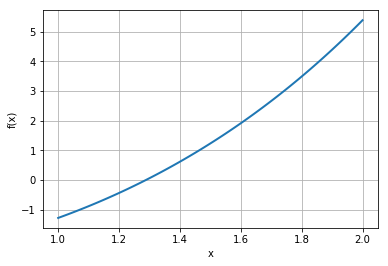

In [9]:
def f(x):
    return exp(x) + x**2 - x - 4

def df(x):
    return exp(x) + 2*x - 1

x = linspace(1, 2, 101)
plot(x, f(x))
xlabel('x')
ylabel('f(x)');

The rough estimate from this is 1.3

#### Find a numerical solution by the use of the function newton in the Jupyter note.

In [10]:
def newton(f, df, x0, tol=1.e-8, max_iter=30):
    # Solve f(x)=0 by Newtons method
    # The output of each iteration is printed
    # Input:
    #   f, df:   The function f and its derivate f'.
    #   x0:  Initial values
    #   tol: The tolerance
    # Output:
    #   The root and the number of iterations
    x = x0
    print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(0, x, f(x)))
    for k in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:           # Accept the solution 
            break 
        x = x - fx/df(x)            # Newton-iteration
        print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(k+1, x, f(x)))
    return x, k+1

In [11]:
x_0 = 1.3

x,k = newton(f,df,x_0)

print(f'\nWith {k} iterations of Newton we got {x:.3f} som tilnærmet løsning.')

k =  0, x =  1.300000000000000, f(x) =  5.930e-02
k =  1, x =  1.288746758560088, f(x) =  3.581e-04
k =  2, x =  1.288677969382023, f(x) =  1.332e-08
k =  3, x =  1.288677966823868, f(x) = -4.441e-16

With 4 iterations of Newton we got 1.289 som tilnærmet løsning.


### 3b: 

In [12]:
def fixpoint(g, x0, tol=1.e-8, max_iter=30):
    # Solve x=g(x) by fixed point iterations
    # The output of each iteration is printed
    # Input:
    #   g:   The function g(x)
    #   x0:  Initial values
    #   tol: The tolerance
    # Output:
    #   The root and the number of iterations
    x = x0
    print('k ={:3d}, x = {:14.10f}'.format(0, x))  
    for k in range(max_iter):        
        x_old = x                        # Store old values for error estimation 
        x = g(x)                         # The iteration
        err = abs(x-x_old)               # Error estimate
        print('k ={:3d}, x = {:14.10f}'.format(k+1, x))
        if err < tol:          # The solution is accepted 
            break
    return x, k+1

In [13]:
def g1(x):
    return log(4 + x - x ** 2)

def g2(x):
    return sqrt(-exp(x) + x + 4)

def g3(x):
    return exp(x + x ** 2 - 4)

funcs = [g1,g2,g3]
x_0 = 1.5

for n, func in enumerate(funcs, start=1):
    print(f'\nFunction {n}, ')
    print(round(f(fixpoint(func, x_0)[0]), 4))


Function 1, 
k =  0, x =   1.5000000000
k =  1, x =   1.1786549963
k =  2, x =   1.3322149248
k =  3, x =   1.2690350905
k =  4, x =   1.2970764687
k =  5, x =   1.2850003170
k =  6, x =   1.2902719159
k =  7, x =   1.2879840175
k =  8, x =   1.2889795000
k =  9, x =   1.2885468343
k = 10, x =   1.2887349735
k = 11, x =   1.2886531806
k = 12, x =   1.2886887430
k = 13, x =   1.2886732816
k = 14, x =   1.2886800038
k = 15, x =   1.2886770812
k = 16, x =   1.2886783519
k = 17, x =   1.2886777994
k = 18, x =   1.2886780396
k = 19, x =   1.2886779352
k = 20, x =   1.2886779806
k = 21, x =   1.2886779608
k = 22, x =   1.2886779694
0.0

Function 2, 
k =  0, x =   1.5000000000
k =  1, x =   1.0091139329
k =  2, x =   1.5053054929
k =  3, x =   0.9998878264
k =  4, x =   1.5105995169
k =  5, x =   0.9905322092
k =  6, x =   1.5158710552
k =  7, x =   0.9810634053
k =  8, x =   1.5211088914
k =  9, x =   0.9714992449
k = 10, x =   1.5263017049
k = 11, x =   0.9618589916
k = 12, x =   1.5314381

g1 converges to a solution.
g2 does not converge.
g3 converges, however it converges to a number which is not a solution for f.

 ## 4: Fixed points

4a) Let $g(x)$ be a continuous function with continuous derivatives on $(a, b)$ and suppose that it has an inverse $g^{−1}(x)$. Show that if $r \in (a, b)$ is a fixed-point of $g(x)$, then $r$ is also a fixed-point of $g^{−1}(x)$.

Inverse means that $g^{-1}(g(x)) = x = g(g^{-1}(x))$.

A fixed point on g defined as $g(r) = r$

\begin{align}
    g^{-1}(g(x)) &= x
    \\ g^{-1}(g(r)) &= r
    \\ g(r) &= r
    \\ g^{-1}(r) &= r
\end{align}


This means a fixed point in $g$ also is a fixed point for the inverse.


\begin{align}
    g(g^{-1}(x)) &= x
    \\ \frac{d}{dx}(g(g^{-1}(x))) &= \frac{d}{dx}x
    \\ (\frac{d}{dx}g(g^{-1}(x)))(\frac{d}{dx}g^{-1}(x)) &= 1
    \\ \frac{d}{dx}g^{-1}(x) &= \frac{1}{\frac{d}{dx}g(g^{-1}(x))}
    \\ \frac{d}{dx}g^{-1}(x) &= \frac{1}{g'(g^{-1}(x))}
\end{align}

We now substitute $x = r$ and use the definition of the fixed point:

\begin{align}
    \frac{d}{dx}g^{-1}(x) &= \frac{1}{g'(g^{-1}(x))}
    \\ \frac{d}{dx}g^{-1}(r) &= \frac{1}{g'(g^{-1}(r))}
    \\ (g^{-1})'(r) &= \frac{1}{g'(r)}
\end{align}

This shows that $$g'(r) > 1 \iff (g^{-1})'(r) < 1 $$ and $$g'(r) < 1 \iff (g^{-1})'(r) > 1 $$.

Meaning we have proved that if $|g′(r)| > 1$, then $|(g−1)′(r)| < 1$.

In [14]:
def g(x):
    return arccos(x)

def g_inv(x):
    return cos(x)

In [15]:
x,k = fixpoint(g_inv,1.57)

k =  0, x =   1.5700000000
k =  1, x =   0.0007963267
k =  2, x =   0.9999996829
k =  3, x =   0.5403025727
k =  4, x =   0.8575530786
k =  5, x =   0.6542898943
k =  6, x =   0.7934802956
k =  7, x =   0.7013688186
k =  8, x =   0.7639596538
k =  9, x =   0.7221024451
k = 10, x =   0.7504177485
k = 11, x =   0.7314040515
k = 12, x =   0.7442373488
k = 13, x =   0.7356047445
k = 14, x =   0.7414250839
k = 15, x =   0.7375068924
k = 16, x =   0.7401473343
k = 17, x =   0.7383692050
k = 18, x =   0.7395672016
k = 19, x =   0.7387603203
k = 20, x =   0.7393038921
k = 21, x =   0.7389377569
k = 22, x =   0.7391843997
k = 23, x =   0.7390182625
k = 24, x =   0.7391301765
k = 25, x =   0.7390547908
k = 26, x =   0.7391055719
k = 27, x =   0.7390713653
k = 28, x =   0.7390944074
k = 29, x =   0.7390788860
k = 30, x =   0.7390893414


This means that $cos(x)$ has a fixed point in 0.739, which in turn means that our function $arccos(x)$ has a fixed point in 0.739 .

### 5a) Write down Newton’s method applied to the system of equations with 2 iterations.


\begin{align}
    x^2 + y^2 &= 4
    \\ xy &= 1
\end{align}

$$
\begin{pmatrix}
    x_0
    \\ y_0
\end{pmatrix}
=
\begin{pmatrix}
    2
    \\ 0
\end{pmatrix}
$$


$$
f(\mathcal{X}) = 
\begin{bmatrix}
    x^2 + y^2 - 4
    \\ xy - 1
\end{bmatrix}
$$

$$
J[f](\mathcal{X}) = 
\begin{bmatrix}
    2x + y^2 & x^2 + 2y
    \\ y & x
\end{bmatrix}
$$

$$
J(\mathcal{X}_k) \Delta_k = -f(\mathcal{X}_k)
$$
$$
\mathcal{X}_{k+1} = \mathcal{X}_{k} + \Delta_k
$$

$$
J(\mathcal{X}_0) \Delta_0 = -f(\mathcal{X}_0)
$$

$$ 
\begin{bmatrix}
    2*2 + 0^2 & 2^2 + 2*0
    \\ 0 & 2
\end{bmatrix}
\Delta_0
= -
\begin{bmatrix}
    4 - 4
    \\ - 1
\end{bmatrix}
$$

$$
\left[\begin{array}{c c|c}
	4 & 4 & 0\\
	0 & 2 & 1
\end{array}\right]
\sim
\left[\begin{array}{c c|c}
	1 & 0 & 1/2 \\
	0 & 1 & 1/2
\end{array}\right]
\implies \Delta_k = 
\begin{bmatrix}
    -1/2
    \\ 1/2
\end{bmatrix}
$$

$$
\mathcal{X}_1 = 
\begin{bmatrix}
    2
    \\ 0
\end{bmatrix}
+
\begin{bmatrix}
    -1/2
    \\ 1/2
\end{bmatrix}
=
\begin{bmatrix}
    3/2
    \\ 1/2
\end{bmatrix}
$$

 
We have now reached a value for the first iteration.

We now redo for second iteration.

  

$$
J(\mathcal{X}_1) \Delta_1 = -f(\mathcal{X}_1)
$$

$$ 
\begin{bmatrix}
    2*3/2 + (1/2)^2 & (3/2)^2 + 2*1/2
    \\ 1/2 & 3/2
\end{bmatrix}
\Delta_1
= -
\begin{bmatrix}
    9/4 + 1/4 - 4
    \\ 3/4 - 1
\end{bmatrix}
$$

$$ 
\begin{bmatrix}
    13/4 & 13/4
    \\ 1/2 & 3/2
\end{bmatrix}
\Delta_1
= -
\begin{bmatrix}
    6/4
    \\ 1/4
\end{bmatrix}
$$

$$
\left[\begin{array}{c c|c}
	13/4 & 13/4 & -6/4\\
	2 & 6 & -1
\end{array}\right]
\sim
\left[\begin{array}{c c|c}
	1 & 1 & -6/13 \\
	2 & 6 & -1
\end{array}\right]
\sim
\left[\begin{array}{c c|c}
	1 & 1 & -6/13 \\
	0 & 1 & -1/52
\end{array}\right]
\sim
\left[\begin{array}{c c|c}
	1 & 0 & -23/52 \\
	0 & 1 & -1/52
\end{array}\right]
\implies \Delta_k = 
\begin{bmatrix}
    23/52
    \\ -1/52
\end{bmatrix}
$$

$$
\mathcal{X}_2 = 
\begin{bmatrix}
    3/2
    \\ 1/2
\end{bmatrix}
+
\begin{bmatrix}
    23/52
    \\ -1/52
\end{bmatrix}
=
\underline{\underline{
\begin{bmatrix}
   101/52
    \\ 25/52
\end{bmatrix}}}
$$

### 5b: Find an approximation to the solution by using the function newton_sys

In [17]:
set_printoptions(precision=15)

In [18]:
def newton_system(f, jac, x0, tol = 1.e-10, max_iter=20):
    x = x0
    print('k ={:3d}, x = '.format(0), x)
    for k in range(max_iter):
        fx = f(x)
        if norm(fx, inf) < tol:          # The solution is accepted. 
            break
        Jx = jac(x)
        delta = solve(Jx, -fx) 
        x = x + delta            
        print('k ={:3d}, x = '.format(k+1), x)
    return x, k

In [24]:
def f(x):               
    y = array([x[0]**2 + x[1]**2 - 4, 
               x[0]*x[1] - 1])
    return y

def jac(x):
    J = array([[2*x[0] + x[1]**2, x[0]**2 + 2*x[1]],
         [x[1],    x[0]]])
    return J

x0 = array([2, 0])          # Starting values
max_iter = 20
x, nit = newton_system(f, jac, x0, tol = 1.e-12, max_iter = max_iter)  # Apply Newton's method
  
print('\nTest: f(x)={}'.format(f(x)))
if nit == max_iter:
    printf('Warning: Convergence har not been achieved')

k =  0, x =  [2 0]
k =  1, x =  [1.5 0.5]
k =  2, x =  [1.942307692307692 0.519230769230769]
k =  3, x =  [1.934954069472256 0.516817305114424]
k =  4, x =  [1.931072944087003 0.517844763641189]
k =  5, x =  [1.932048989612196 0.517585088122218]
k =  6, x =  [1.931800888907705 0.517651684094069]
k =  7, x =  [1.931864662472829 0.517634603673892]
k =  8, x =  [1.931848315185697 0.517638984421126]
k =  9, x =  [1.931852508501114 0.517637860858834]
k = 10, x =  [1.931851433050457 0.517638149027152]
k = 11, x =  [1.931851708881834 0.517638075118501]
k = 12, x =  [1.9318516381375   0.517638094074398]
k = 13, x =  [1.931851656281832 0.517638089212639]
k = 14, x =  [1.931851651628222 0.51763809045957 ]
k = 15, x =  [1.931851652821768 0.517638090139761]
k = 16, x =  [1.931851652515651 0.517638090221785]
k = 17, x =  [1.931851652594163 0.517638090200747]
k = 18, x =  [1.931851652574026 0.517638090206143]
k = 19, x =  [1.931851652579191 0.517638090204759]
k = 20, x =  [1.931851652577866 0.517638

The results match the ones of the non-computational workings.



### Use newton_sys to solve the slightly perturbed problem:

\begin{align}
    x^2 + y^2 &= 2
    \\ xy &= 1
\end{align}

In [26]:
def f(x):               
    y = array([x[0]**2 + x[1]**2 - 2, 
               x[0]*x[1] - 1])
    return y

def jac(x):
    J = array([[2*x[0] + x[1]**2, x[0]**2 + 2*x[1]],
         [x[1],    x[0]]])
    return J

x0 = array([2, 0])          # Starting values
max_iter = 20
x, nit = newton_system(f, jac, x0, tol = 1.e-12, max_iter = max_iter)  # Apply Newton's method
  
print('\nTest: f(x)={}'.format(f(x)))
if nit == max_iter:
    printf('Warning: Convergence har not been achieved')

k =  0, x =  [2 0]
k =  1, x =  [1.  0.5]
k =  2, x =  [0.8 1.1]
k =  3, x =  [1.052054794520548 0.903424657534247]
k =  4, x =  [0.9080781203748   1.074157052863439]
k =  5, x =  [1.015813361106975 0.973787839927933]
k =  6, x =  [0.91997149397017  1.076309572835665]
k =  7, x =  [0.99213785239008  1.002560039785175]
k =  8, x =  [1.166995847331044 0.831229611538886]
k =  9, x =  [1.017170285381904 0.963619061909634]
k = 10, x =  [0.883667169914659 1.109594099541358]
k = 11, x =  [0.985455545920474 1.003835209434926]
k = 12, x =  [1.188988963675573 0.807429611873142]
k = 13, x =  [1.016927793067913 0.957895589443796]
k = 14, x =  [0.861732408970976 1.129540348644775]
k = 15, x =  [0.9806747464577 1.0045459839213]
k = 16, x =  [1.199114430653456 0.79594921285738 ]
k = 17, x =  [1.016349391048784 0.955264702124353]
k = 18, x =  [0.849399151070507 1.140829798762366]
k = 19, x =  [0.97764255070075  1.005058819674244]
k = 20, x =  [1.201804642214724 0.792420412073888]

Test: f(x)=[ 0.07226